In [27]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import seaborn as sns

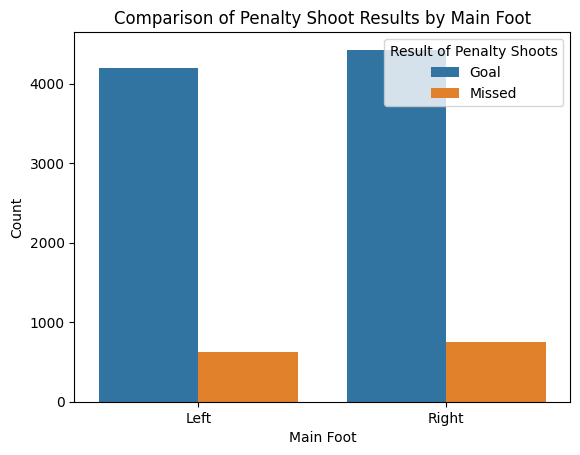

In [28]:
players = pd.read_csv('penalty_kicks_dataset.csv')
players = players.dropna()
players.keys()
foot = players['Main Foot']
penalties = players['Penalty Shoot Direction']
result = players['Result of Penalty Shoots']


sns.countplot(x='Main Foot', hue='Result of Penalty Shoots', data=players)

plt.title('Comparison of Penalty Shoot Results by Main Foot')
plt.xlabel('Main Foot')
plt.ylabel('Count')

plt.show()


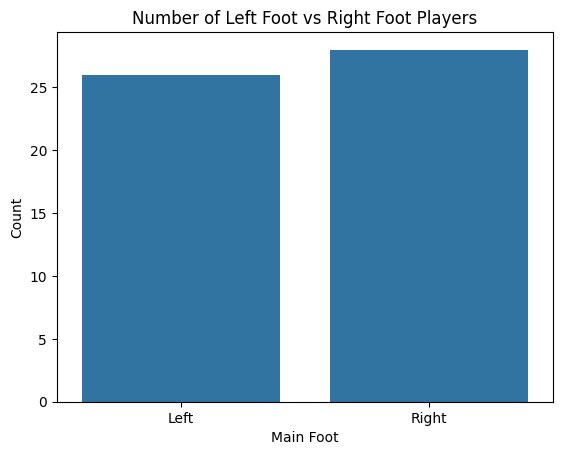

In [29]:
players_stats = pd.read_csv('players.csv')
sns.countplot(x='main_foot', data=players_stats)

plt.title('Number of Left Foot vs Right Foot Players')
plt.xlabel('Main Foot')
plt.ylabel('Count')

plt.show()

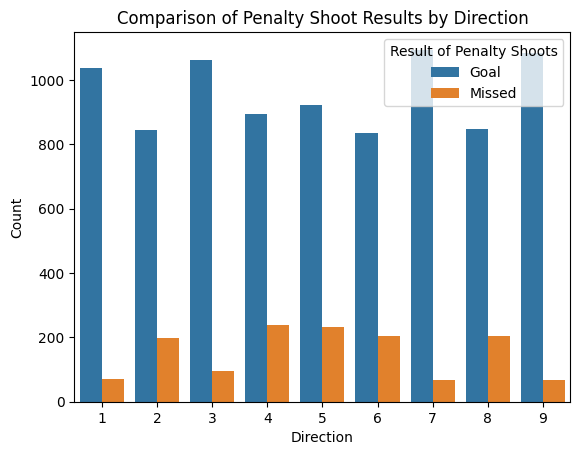

In [30]:
direction = players['Penalty Shoot Direction']
result = players['Result of Penalty Shoots']
sns.countplot(x='Penalty Shoot Direction', hue='Result of Penalty Shoots', data=players)

plt.title('Comparison of Penalty Shoot Results by Direction')
plt.xlabel('Direction')
plt.ylabel('Count')

plt.show()

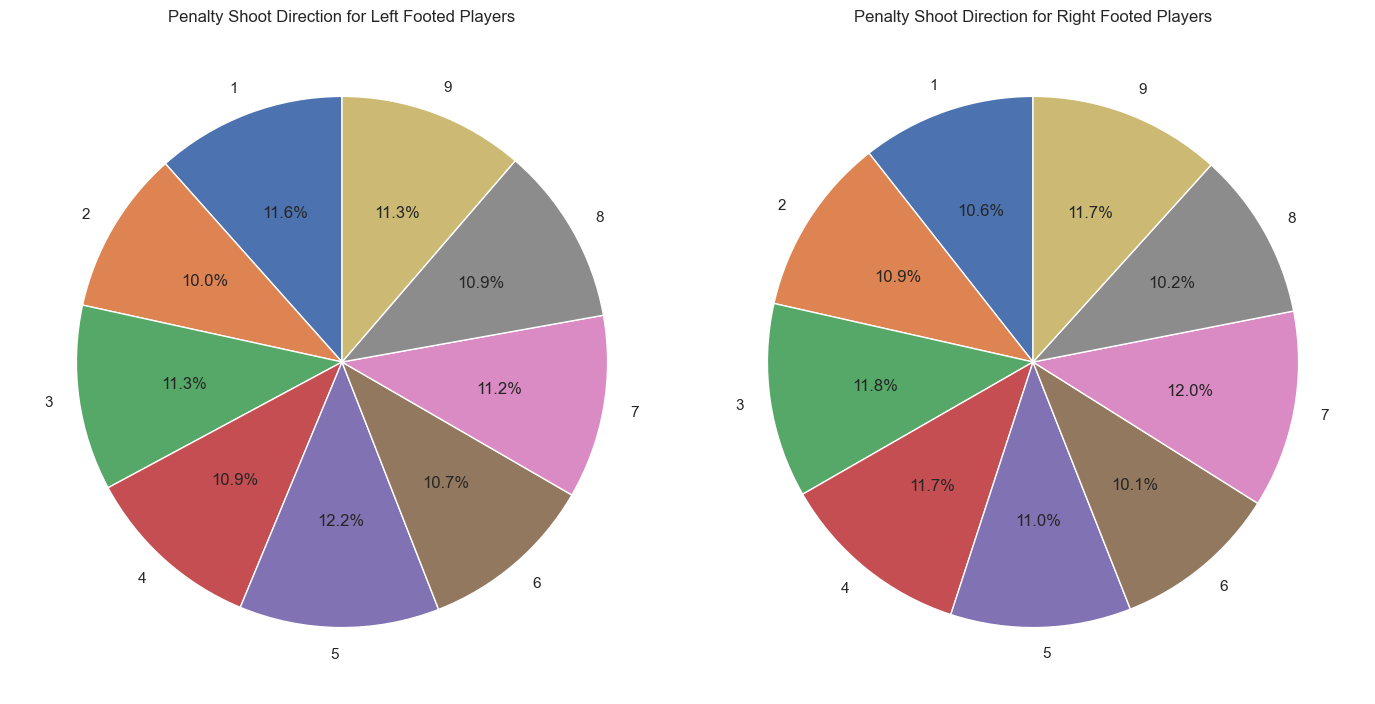

In [37]:
foot_direction_counts = players.groupby('Main Foot')['Penalty Shoot Direction'].value_counts(normalize=True) * 100
# Convert the Series with MultiIndex to a DataFrame
foot_direction_df = foot_direction_counts.reset_index(name='Percentage')

pivot_df = foot_direction_df.pivot(index='Penalty Shoot Direction', columns='Main Foot', values='Percentage')

# Plotting the pie charts for each foot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for players with 'Left' foot
ax[0].pie(pivot_df['Left'].dropna(), labels=pivot_df['Left'].dropna().index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Penalty Shoot Direction for Left Footed Players')

# Pie chart for players with 'Right' foot
ax[1].pie(pivot_df['Right'].dropna(), labels=pivot_df['Right'].dropna().index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Penalty Shoot Direction for Right Footed Players')

# Display the plots
plt.tight_layout()
plt.show()
